<div style = "font-family:Georgia;
              font-size:2.5vw;
              color:lightblue;
              font-weight:normal;
              text-align:center;
              background:url('./text_images/Title Background.gif') no-repeat center; background-size:cover)">
    <br>
    <br>
    Principal Component Analysis (PCA)
    <br>
    <br>
    <br>
</div>

# Introduction

In the previous lessons you've learned the core idea behind **Principal Component Analysis (PCA)** and leanred about eigenvectors and eigenvalues. Before we apply PCA to Risk Factor Models, in this notebook, we will see how we can use PCA for **Dimensionality Reduction**. In short, dimensionality reduction is the process of reducing the number of variables used to explain your data.

We will start by giving a brief overview of dimensionality reduction, we will then use Scikit-Learn's implementation of PCA to reduce the dimension of random correlated data and visualize its principal components. 


# Dimensionality Reduction

One of the main applications of Principal Component Analysis is to reduce the dimensionality of highly correlated data. For example, suppose your data looks like this: 
<br>
<figure>
  <img src = "./text_images/1.png" width = 80% style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align: center; font-style: italic">Fig 1. - Highly Correlated Data.</figcaption>
</figure> 
<br>

We can see that this 2-Dimesnional data is described by two variables, $X$ and $Y$. However, notice that all the data points lie close to a straight line: 

<br>
<figure>
  <img src = "./text_images/2.png" width = 80% style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align: center; font-style: italic">Fig 2. - Direction of Biggest Variation.</figcaption>
</figure> 
<br>

We can see that most of the variation in the data occurs along this particular purple line. This means, that we could explain most of the variation of the data by only looking at how the data is distributed along this particular line. Therefore, we could reduce the data from 2D to 1D data by projecting the data points onto this straight line:

<br>
<figure>
  <img src = "./text_images/3.png" width = 80% style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align: center; font-style: italic">Fig 3. - Projected Points.</figcaption>
</figure> 
<br>

This will reduce the number of variables needed to describe the data from 2 to 1 since you only need one number to specify a data point's position on a straight line. Therefore, the 2 variables that describe the 2D plot will be replaced by a new single variable that encodes the 1D linear relation.

<br>
<figure>
  <img src = "./text_images/4.png" width = 80% style = "border: thin silver solid; padding: 10px">
      <figcaption style = "text-align: center; font-style: italic">Fig 4. - Data Reduced to 1D.</figcaption>
</figure> 
<br>


It is important to note, that this new variable and dimension don't need to have any particular meaning attached to them. For example, in the original 2D plot, $X$ and $Y$ may represent stock returns, however, when we perform dimensionality reduction, the new variables and dimensions don't need to have any such meaning attach to them. The new variables and dimensions are just abstract tools that allow us to express the data in a more compact form. While in some cases these new variables and dimensions may represent a real-world quantities, it is not necessary that they do.

Dimensionality reduction of correlated data works on any number of dimensions, *i.e.* you can use it to reduce $N$-Dimensional data to $k$-Dimensional data, where $k < N$. As mentioned earlier, PCA is one of the main tools used to perform such dimensionality reduction. To see how this is done, we will apply PCA to some random corelated data. In the next section, we create random data with a given amount of correlation. 


# Create a Dataset

In this section we will learn how to create random correlated data. In the code below we will use the `utils.create_corr_data()` function from the `utils` module to create our random correlated data. The `utils` module was created specifically for this notebook and contains some useful functions. You are welcome to take a look it to see how the fucntions work. In the code below, you can choose the data range and the amount of correlation you want your data to have. These parameters are then passed to the `utils.create_corr_data()` function to create the data. Finally we use the `utils.plot_data()` function from the `utils` module to plot our data. You can explore how the data changes depending on the amount of correlation. Remember the correlation is a number ranging from -1 to 1. A correlation `0` indicates that there is no correlation between the data points, while a correlation of `1` and `-1` indicate the data points display full positive and negative correlation, respectively. This means, that for `corr = +/-1` all the points will lie in a straight line.  

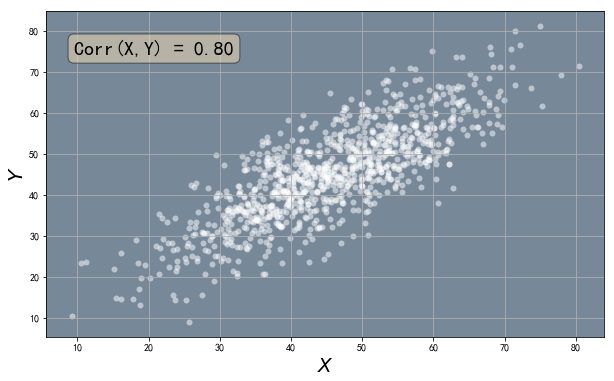

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set data range
data_min = 10
data_max = 80

# Set the amount of correlation. The correlation is anumber in the closed interval [0,1].
corr = 0.8

# Create correlated data
X = utils.create_corr_data(corr, data_min, data_max)

# Plot the correlated data
utils.plot_data(X, corr)

# Mean Normalization

Before we can apply PCA to our data, it is important that we mean normalize the data. Mean normalization will evenly distribute our data in some small interval around zero. Consequently, the average of all the data points will be close to zero. The code below uses the `utils.mean_normalize_data()` function from the `utils` module to mean normalize the data we created above. We will again use the `utils.plot_data()` function from the `utils` module to plot our data. When we plot the mean normalized data, we will see that now the data is evenly distributed around the origin with coordinates`(0,0)`. This is expected because the average of all points should be zero. 

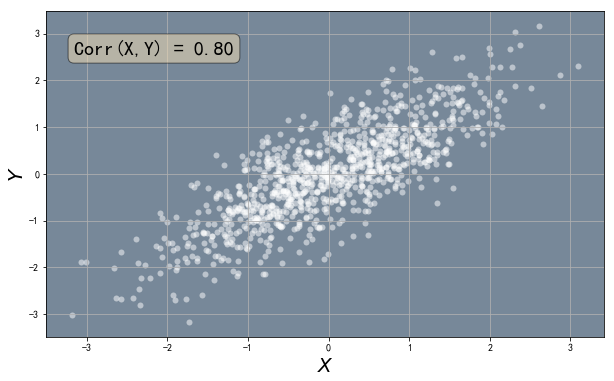

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Mean normalize X
X_norm = utils.mean_normalize_data(X)

# Plot the mean normalized correlated data
utils.plot_data(X_norm, corr)

# PCA In Brief

Let's go back to the example we saw at the beginning. We had some 2D data that lies close to a straight line and we would like to reduce this data from 2D to 1D by projecting the data points onto a straight line. But how do we find the best straight line to project our data onto? In fact, how do we define the best straight line? We define the best line as the line such that the sum of the squares of the distances of the data points to their projected counterparts is minimized. It is important to note, that these projected distances are orthogonal to the straight line, not vertical as in linear regression. Also, we refer to the distances from the data points to their projected counterparts as *projection errors*. Now that we have defined what the best straight line should be, how do we find it? This is where PCA comes in. For this particular example, PCA will find a straight line on which to project the data such that the sum of squares of the projection errors is minimized. So we can use PCA to find the best straight line to project our data onto.

In general, for $N$-Dimensional data, PCA will find the lower dimensional surface on which to project the data so as to minimize the projection error. The lower dimensional surface is going to be determined by a set of vectors $v^{(1)}, v^{(2)}, ...v^{(k)}$, where $k$ is the dimension of the lower dimensional surface, with $k<N$. So for our example above, where we were reducing 2D data to 1D data, so $k=1$, and hence the lower dimensional surface, a straight line in this case, will be determined by only one vector $v^{(1)}$. This makes sense because you only need one vector to describe a straight line. Similarly in the case of reducing 3D data to 2D data, $k=2$, and hence we will have two vectors to determine a plane (a 2D surface) on which to project our data.

Therefore, what the PCA algorithm is really doing is finding the vectors that determine the lower dimensional surface that minimizes the projection error. As you learned previously, these vectors correspond to a subset of the eigenvectors of the data matrix $X$. We call this subset of eigenvectors the *Principal Components* of $X$. We also define the first principal component to be the eigenvector corresponding to the largest eigenvalue of $X$; the second principal component as the eigenvector corresponding to the second largest eigenvalue of $X$, and so on. If $v^{(1)}, v^{(2)}, ...v^{(N)}$ is the set of eigenvectors of $X$ then the principal components of $X$ will be determined by the subset $v^{(1)}, v^{(2)}, ...v^{(k)}$, for some chosen value of $k$, where $k<N$. Remember that $k$ determines the dimension of the lower dimensional surface were projecting our data to. 

You can program the PCA algorithm by hand, but luckily many packages, such as Scikit-Learn, already contain built-in functions that perfrom the PCA algorithm for you. In the next section we will take a look at how we can implement the PCA algorithm using Scikit-Learn. 


# PCA With Scikit-Learn

We can perform principal component analysis on our data using Scikit-Learn's [`PCA()` class](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Scikit-Learn's `PCA()` class uses a technique called **Singular Value Decomposition (SVD)** to compute the eigenvectors and eigenvalues of a given set of data. Given a matrix $X$ of shape $(M, N)$, the SVD algorithm consists of factorizing $X$ into 3 matrices $U, S$, and $V$ such that:

\begin{equation}
X = U S V
\end{equation}

The shape of the $U$ and $V$ matrices depends on the implementation of the SVD algorithm. When using Scikit-Learn's `PCA()` class, the $U$ and $V$ matrices have dimensions $(M, P)$ and $(P,N)$, respectevely, where $P = \min(M, N)$. The $V$ matrix contains the eigenvectors of $X$ as rows and the $S$ matrix is a diagonal $(P,P)$ matrix and contains the eigenvalues of $X$ arranged in decreasing order, *i.e.* the largest eigenvalue will be the element $S_{11}$, the second largest eigenvalue will be the element $S_{22}$, and so on. The eigenvectors in $V$ are arranged such that the first row of $V$ holds the eigenvector correspoding to the eigenvalue in $S_{11}$, the second row of $V$ will hold the eigenvector corresponding to eigenvalue in $S_{22}$, and so on.

Once the eigenvectors and eigenvalues have been calculated using SVD, the next step in dimensionality reduction using PCA is to choose the size of the dimension we are going to project our data onto. The size of this dimension is determined by $k$, which tells us the number of principal components we want to use. We can tell the `PCA()` class the number of principal components to return, by setting the parameter `n_components=k`, for some chosen value of $k$, like in the code below:

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

print('\nPCA Parameters:', pca, '\n')


PCA Parameters: PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False) 



As we can see `pca`contains the parameters we are going to use for our PCA algorithm. Since the random correlated data we created above is 2D, then in this case, $X$ will have a maximum of 2 eigenvectors. We have chosen $k=2$, so that the `PCA()` class will return both principal components (eigenvectors). We chose $k=2$ because we want to visulaize both principal components in the next section. If we didn't want to visulaize both pricncipal components, but rather perform dimensionality reduction directly, we would have chosen $k=1$, to reduce our 2D data to 1D, as we showed at the beginnig. 

After we have set the paramters of our PCA algorithm, we now have to pass the data to the `PCA()` class. This is done via the `.fit()` method as shown in the code below:

In [7]:
X_norm

array([[-1.87826023, -1.59768767],
       [-1.71047431, -0.24240817],
       [-1.53080027, -2.14279649],
       ...,
       [-0.24957421, -0.17795334],
       [-1.44534787, -1.32452374],
       [ 1.51811654,  0.66507353]])

In [8]:
pca.fit(X_norm);

Once the `PCA()` class fits the data through the `.fit()` method it returns an array containing the principal components in the attribute `.components_`, and the corresponding eigenvalues in a 1D array in the attribute `.singular_values_`. Other attributes of the `PCA()` class include `.explained_variance_ratio_` which gives the percentage of variance explained by each of the principal components. In the code below we access the above attributes and display their contents:

In [9]:
print('\nArray Containing all Principal Components:\n', pca.components_)
print('\nFirst Principal Component:', pca.components_[0])
print('Second Principal Component:', pca.components_[1])
print('\nEigenvalues:', pca.singular_values_)
print('\nPercentage of Variance Explained by Each Principal Component:', pca.explained_variance_ratio_)


Array Containing all Principal Components:
 [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

First Principal Component: [-0.70710678 -0.70710678]
Second Principal Component: [ 0.70710678 -0.70710678]

Eigenvalues: [42.39465018 14.23705152]

Percentage of Variance Explained by Each Principal Component: [0.89865318 0.10134682]


We can see that the first principal component has a corresponding eigenvalue of around 42, while the second principal component has an eigenvalue of around 14. We can also see from the `.explained_variance_ratio_` attribute that the first principal component explains approximately 90% of the variance in the data, while the second principal components only explains around 10%. In general, the principal components with the largest eigenvalues, explain the mayority of the variance. In dimensionality reduction, it is custumary to project your data onto the principal components that explain the mayority of the variance. In this case for example, we would like to project our data onto the first principal component, since it exaplans 90% of the variance in the data. For more inforamtion on Scikit-Learn's `PCA()` class please see the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). 

# Visualizing The Principal Components

Now that we have our principal components, let's visualize them. In the code below we use the `utils.plot_data_with_pca_comp()` function from the `utils` module to calculate the principal components of our random correlated data. The function performs all the steps we have seen above and then plots the resulting principal components along with the data. In order to prevent you from scrolling up and down the notebook to create new random correlated data, I have copied the same code as before so you can change the parameters of the random data here as well.  

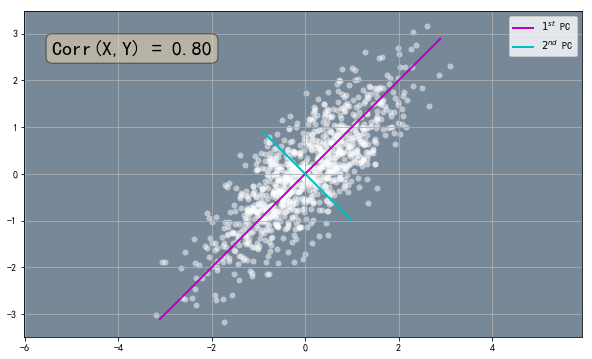

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

import utils

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Set data range
data_min = 10
data_max = 80

# Set the amount of correlation
corr = 0.8

# Plot the data and the principal components   
utils.plot_data_with_pca_comp(corr, data_min, data_max)

# Choosing The Number of Components

As we saw, the dimension of the lower dimensional surface, $k$, is a free parameter of the PCA algorithm. When working with low dimensional data, choosing the value of $k$ can be easy, for example, when working with 2D data, you can choose $k=1$, to reduce your 2D data to 1D. However, when working with high dimensional data, a suitable value for $k$ is not that clear. For example, suppose you had 1,000-dimensional data, what will be the best choice for $k$? Should we choose $k=500$ to reduce our data from 1,000D to 500D, or we could do better than that and reduce our data to 100D by choosing $k=100$. 

Usually, the number of principal components, $k$, is chosen depending on how much of the variance of the original data you want to retain. Typically, you choose $k$ such that anywhere from 80% to 99% of the variance of the original data is retained, however you can choose a lower percentage if that is what you desire for your particular application. You check the percentage of the variance of your data that is explained for a given value of $k$ using the `.explained_variance_ratio_` attribute as we saw before. So, in practice what you will do, is to have the `PCA()`class return all the eigenvectors and then add up the elements in the array returned the `.explained_variance_ratio_` attribute until the desired retained variance is reached. For example, if we wanted to retain 98% of the variance in our data we choose $k$ such that the following condition is true:

\begin{equation}
\sum_{i=1}^k P_{i} \geq 0.98
\end{equation}

where $P$ is the array returned the `.explained_variance_ratio_` attribute. So, if you are choosing the value of $k$ manually, you can use the above formula to figure out what percentage of variance was retained for that particular value of $k$. For highly correlated data, it is possible to reduce the dimensions of the data significantly, even if we retain 99% of the variance. 


# Projected Data

Now that we have seen what all the principal components look like, we will now use the `PCA()` class with `n_components = 1` so that we can perform dimensionality reduction. Once we find the vectors (principal component) that span our lower dimensional space, the next part of the dimensionality redcution algorithm is to find the projected values of our data onto that space. We can use the `.transform()` method from the `PCA()` class to apply dimensionalty reduction and project our data points onto the lower dimensional space. In our simple example, $k=1$, so we will only have a principal component to project our data onto. 

In the code below, we apply PCA with `n_components = 1`  and use the `.transform()` method to project our data points onto a straight line. Finally we plot our projected data.

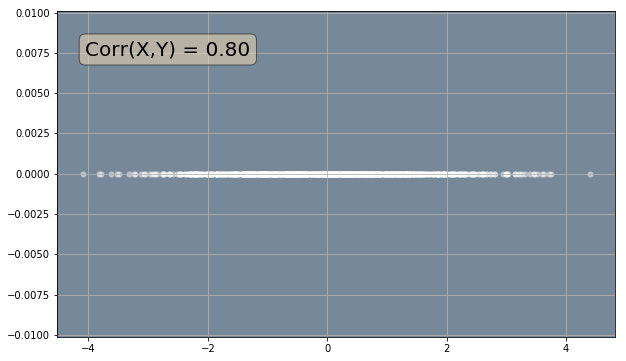

In [24]:
import numpy as np

from sklearn.decomposition import PCA

pca = PCA(n_components = 1)

pca.fit(X_norm);

transformed_data = pca.transform(X_norm)

yvals = np.zeros(1000)

# Plot the data
plt.scatter(transformed_data, yvals, color = 'white', alpha = 0.5, linewidth = 0)
ax = plt.gca()
ax.set_facecolor('lightslategray')
plt.grid()

plt.show()